# Comparing Python simulation to original Excel water balances<a id="top"></a>

_Developed by Davíd Brakenhoff (Artesia) on July 19, 2019_
<hr>

This notebook shows how to compare a simulation with the Python waterbalans module to the original Excel balance.

## Contents
- [Prepare files](#0)
- [Run an EAG](#1)
- [Compare to Excel](#2)

Import the requisite modules

In [1]:
import sys
sys.path.insert(1, "../..")
from waterbalansen_scripts.util import unzip_changed_files
import waterbalans as wb

## [Prepare files](#top)<a id="0"></a>

The water balance from the Excel files has been extracted using a Python script (`waterbalansen_scripts.excel_io.scrape_excel_to_pklz()`) and stored as a Pickled DataFrame. This way the results from Excel can be quickly loaded into Python for comparison with the Python water balances.

_**Note:** the excel data was stored as a zipped Pickle object. This file format is highly reliant on Python version, package versions and system architecture. If you get an error trying to read in these files, it is likely this is the cause of that problem._

In [2]:
# Unzip changed excel balance files for comparison
unzip_changed_files("../../data/excel_pklz.zip", "../../data/excel_pklz",
                    check_time=True, check_size=True, debug=True)

## [Run an EAG](#top)<a id="1"></a>

Pick an EAG to run (make sure there is also an Excel version of this water balance).

In [3]:
e = wb.run_eag_by_name("2250-EAG-2", csvdir="../../data/input_csv", tmax="2014")

2021-07-08 18:13:03,129 | create_eag - INFO : Creating EAG object for '2250-EAG-2'
2021-07-08 18:13:03,147 | add_series_from_database - INFO : Parsing timeseries from database export and adding to EAG.
2021-07-08 18:13:03,154 | get_series - INFO : Adding Local timeseries 'Neerslag' for Bucket '-9999'.
2021-07-08 18:13:03,155 | get_series - INFO : Adding Local timeseries 'Uitlaat4' for Bucket '-9999'.
2021-07-08 18:13:03,156 | get_series - INFO : Adding Local timeseries 'Gemaal1Debiet Pomp 1' for Bucket '-9999'.
2021-07-08 18:13:03,157 | get_series - INFO : Adding Local timeseries 'Gemaal1Debiet Pomp 2' for Bucket '-9999'.
2021-07-08 18:13:03,158 | get_series - INFO : Adding Local timeseries 'Peil' for Bucket '-9999'.
2021-07-08 18:13:03,160 | get_series - INFO : Adding Local timeseries 'Gemaal2Debiet Pomp 2' for Bucket '-9999'.
2021-07-08 18:13:03,161 | get_series - INFO : Adding Local timeseries 'Gemaal3Debiet Pomp 2' for Bucket '-9999'.
2021-07-08 18:13:03,162 | get_series - INFO : A

## [Compare to Excel](#top)<a id="2"></a>

Comparing to Excel has been made simple with the function `wb.utils.compare_to_excel_balance`. This function knows which columns are supposed to be compared to one another and plots each flux on a separate subplot. 

It shows the values calculated with Python in a blue line, and the value from the Excel file in a dashed orange line. By passing `showdiff=True` it also plots a thin purple line showing the difference between the two. The function also has a crude method that attempts to determine whether the difference between Python and Excel is significant. If it deems the difference significant, the background of the plot is red, otherwise it is green.

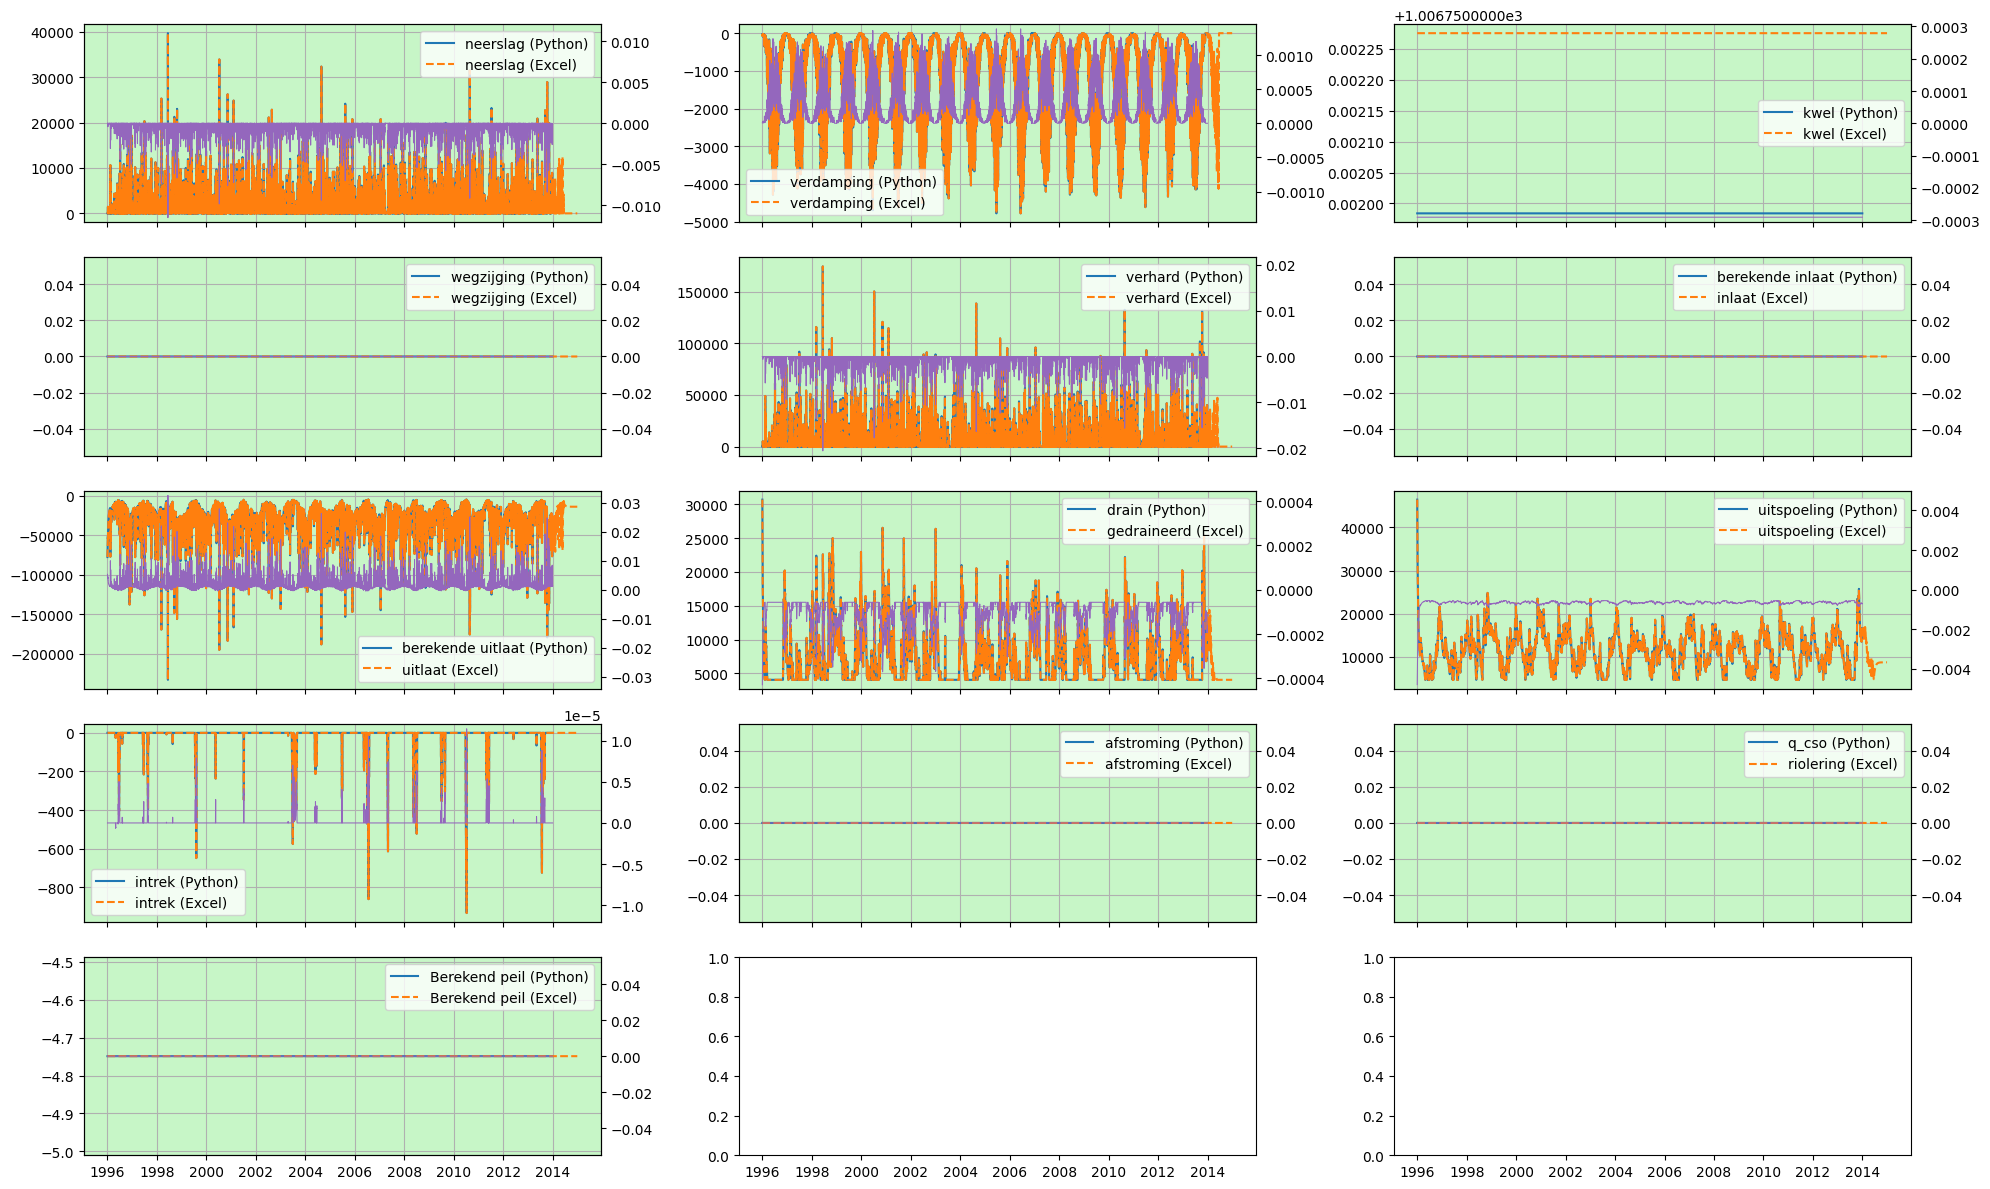

In [4]:
ax = wb.utils.compare_to_excel_balance(e, "../../data/excel_pklz")

If the readability of the plot is an issue, modify the dpi settings in the `eag.plot` module. Modifying this manually and recreating the plot will change the appearance. The current settings work well for high-dpi screens. For Full-HD resolution change the dpi setting to e.g. 100.

In [5]:
e.plot.dpi

100

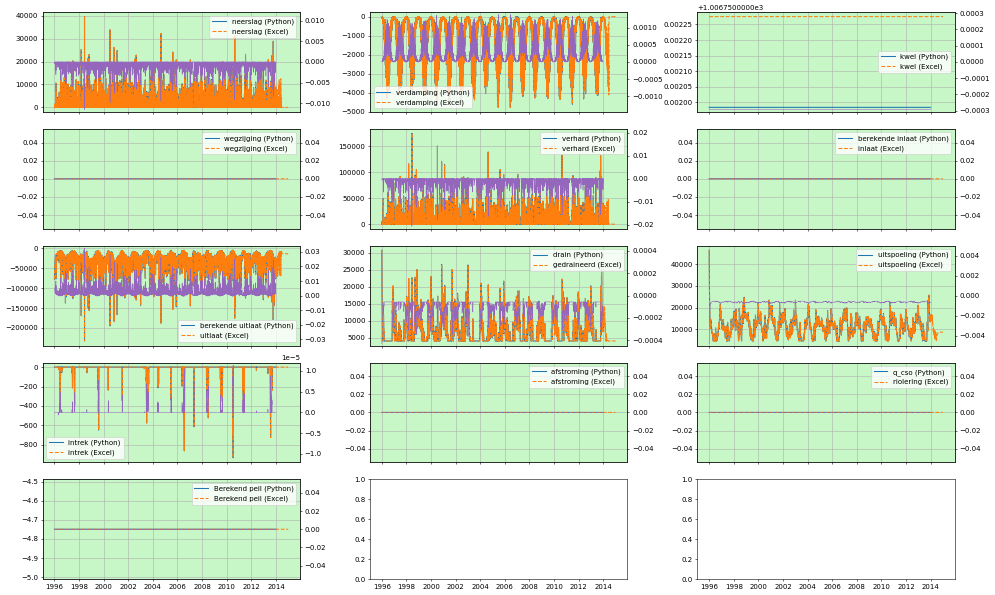

In [6]:
e.plot.dpi = 50  # as an example
ax = wb.utils.compare_to_excel_balance(e, "../../data/excel_pklz")